<a href='https://www.youtube.com/watch?v=6GUZXDef2U0'>
<h1 style='font-size:40px'>Seaborn Tutorial </h1>
    </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<h2 style='font-size:30px'> Importando os dados</h2>

In [2]:
# O primeiro dataset a ser usado aborda acidentes de trânsito.
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


<h2 style='font-size:30px'> Distribution Plots</h2>

<h3 style='font-size:30px;font-style:italic'> Distribution Plot</h3>

/home/veiga/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='not_distracted', ylabel='Density'>

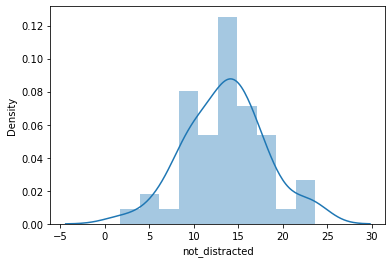

In [3]:
# Nos mostra a distribuição de frequências dos valores de uma dada coluna do DF.
sns.distplot(crash_df.not_distracted, bins=10)

<h3 style='font-size:30px;font-style:italic'> Joint Plot</h3>

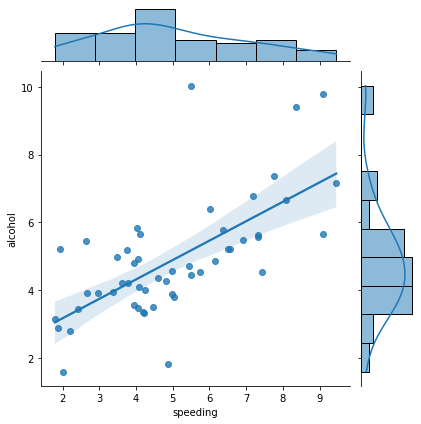

In [4]:
# Nos mostra a densidade de duas variáveis do dataset. O método inclui diversas versões para
# esse jointplot, como o de regressão linear.
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

<h3 style='font-size:30px;font-style:italic'> KDE</h3>

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

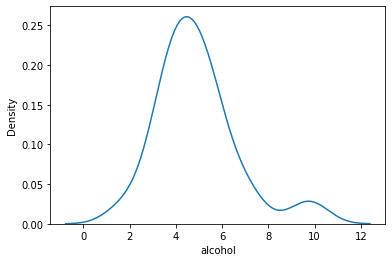

In [5]:
# Funcionalidade similar com os gráficos já abordados
sns.kdeplot(crash_df['alcohol'])

<h3 style='font-size:30px;font-style:italic'> Pair Plots</h3>

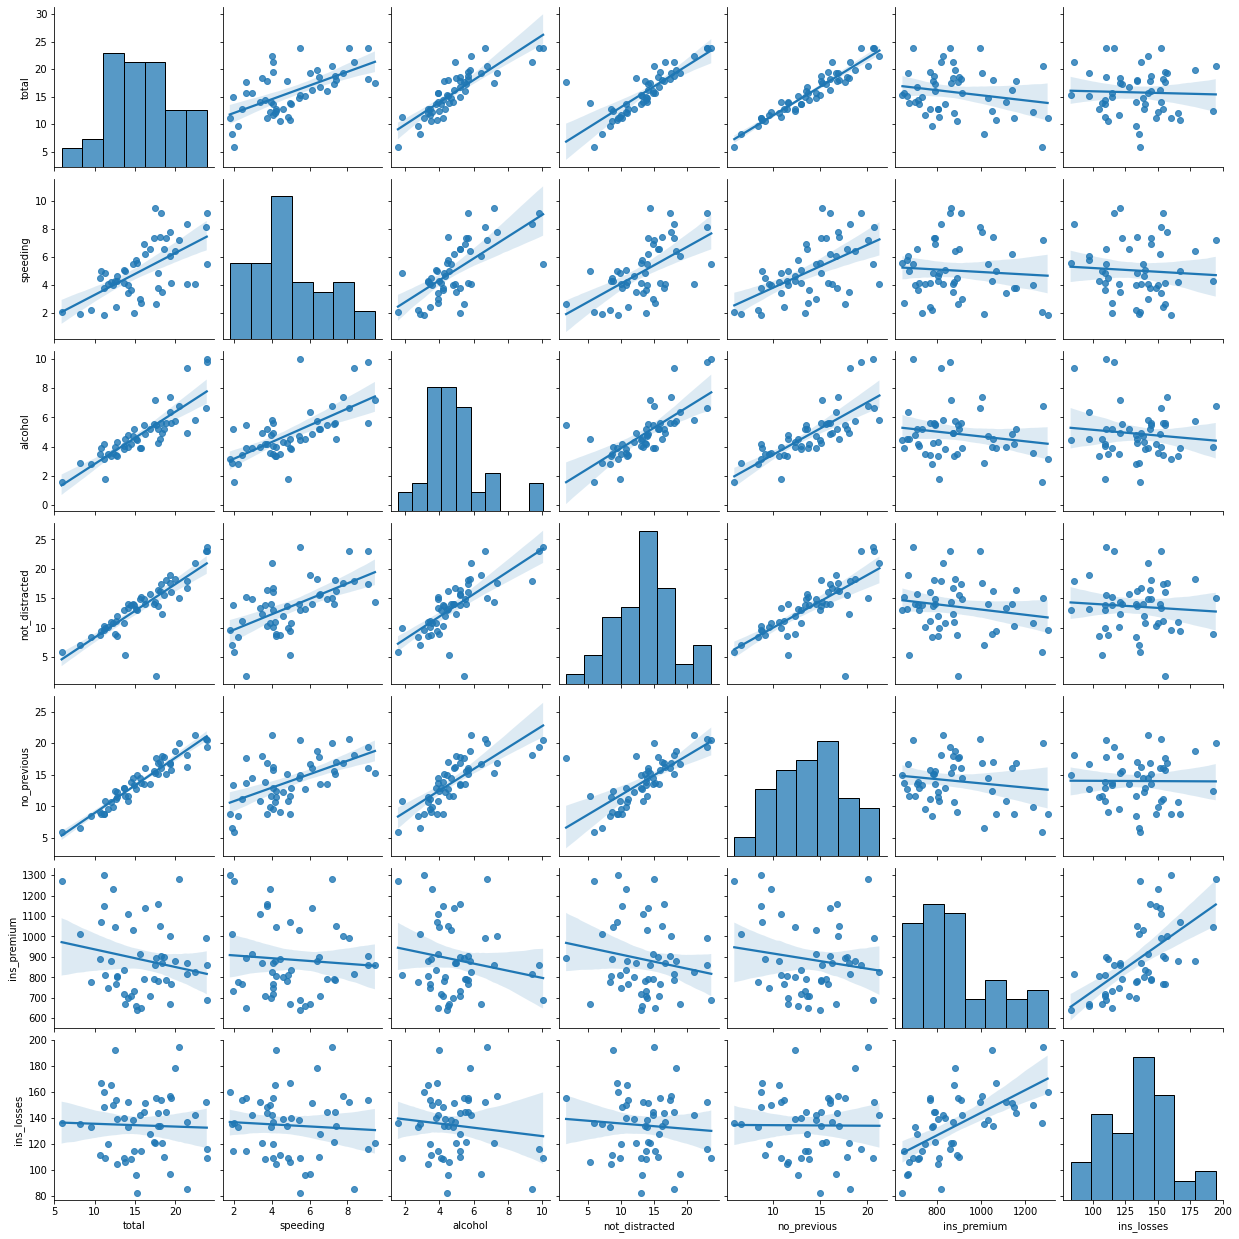

In [6]:
# Equivalentes à scatter matrix do pandas.plotting.
# Bastante útil em modelos de ML, já que o tipo de scatter plot pode ser definido como 'reg'
sns.pairplot(crash_df, kind='reg')

<h3 style='font-size:30px;font-style:italic'> Rug Plot</h3>

In [7]:
# Vamos carregar primeiro um dataset sobre gorjetas.
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='tip'>

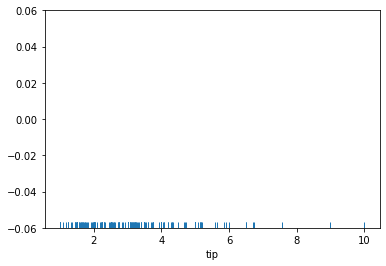

In [8]:
# Não muito popular. Cada instância de dado recebe uma fina coluna no gráfico.
# Sua intenção é dar uma outra abordagem à visualização de densidades.

# Útil para a identicação de outliers.
sns.rugplot(tips_df.tip)

<h2 style='font-size:30px'> Categorical Plots</h2>

<h3 style='font-size:30px;font-style:italic'> Bar Plots</h3>

<AxesSubplot:xlabel='day', ylabel='total_bill'>

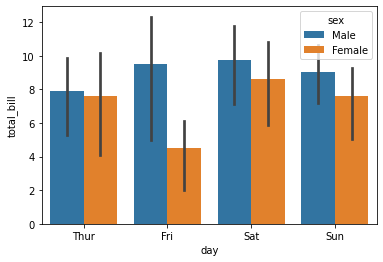

In [9]:
# Diferentemente dos barplots do matplotlib, a versão do seaborn comporta um agrupamento das barras.

# Aqui, as barras, além de serem designadas ao sexo dos garçons, são agrupadas conforme o dia da semana.
sns.barplot(x='day', y='total_bill', hue='sex', data=tips_df, estimator=np.std)

<h3 style='font-size:30px;font-style:italic'> Count Plot</h3>

<AxesSubplot:xlabel='sex', ylabel='count'>

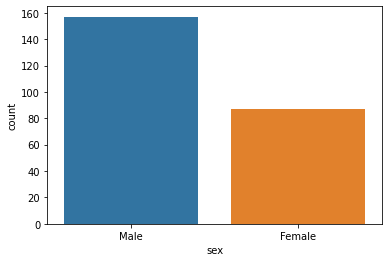

In [10]:
# Basicamente, nos revela a contagem de ocorrências das categorias na coluna selecionada.

# Mostrando quantos garçons homens e mulheres há no dataset.
sns.countplot(x = tips_df.sex)

<h3 style='font-size:30px;font-style:italic'> Box Plot</h3>

<AxesSubplot:xlabel='day', ylabel='total_bill'>

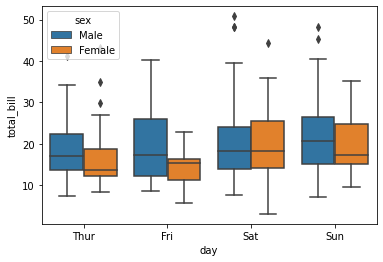

In [17]:
# Responsável por mostrar os quartilos das colunas. A linha das caixas representam a mediana das gorjetas de cada sexo para cada dia
# da semana.
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips_df)

<h3 style='font-size:30px;font-style:italic'> Violin Plot</h3>

<AxesSubplot:xlabel='day', ylabel='total_bill'>

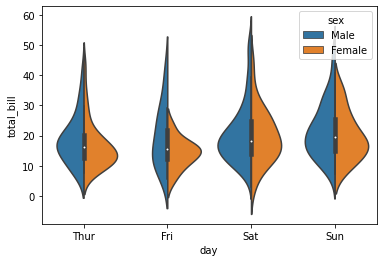

In [19]:
# Uma modificação do box plot, mas mostrando a densidade de dados por ponto no eixo y.

# Utilizar o argumento 'split' pode fazer o violin plot adquirir uma aparência muito melhor, quando usamos 
# o argumento 'hue'.

sns.violinplot(x='day', y='total_bill', hue='sex',data=tips_df, split=True)

<h3 style='font-size:30px;font-style:italic'> Strip Plot</h3>

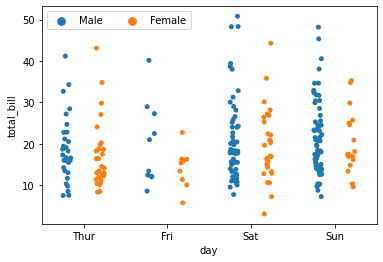

In [23]:
# Um outro tipo de visualização sobre a densidade de informações, no formato de um scatter plot.

# 'jitter' tenta criar um maior espaçamento entre os pontos.
# 'dodge' segrega espacialmente os dados das categorias de 'hue'.
sns.stripplot(x='day', y='total_bill', hue='sex', data=tips_df, jitter=True, dodge=True)
plt.legend(ncol=2)

<h3 style='font-size:30px;font-style:italic'> Swarm Plot</h3>

<AxesSubplot:xlabel='day', ylabel='total_bill'>

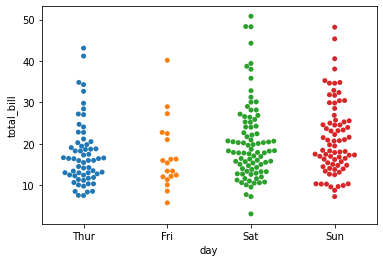

In [24]:
# Indica, de forma similar ao violin plot, a densidade de instâncias por valor do eixo y. 
# A sua peculiaridade é que ele faz isso mostrando os os pontos de dados.
sns.swarmplot(x='day', y='total_bill', data=tips_df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

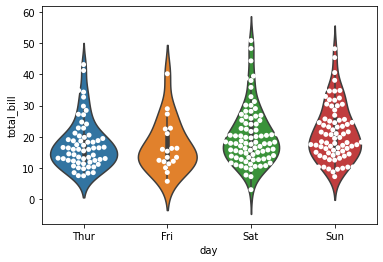

In [28]:
# O autor do vídeo deu uma dica bastante interessante sobre combinar o swarm plot com o violin plot.
# Com isso, os visuais se complementam (lembre-se de usar color='white' no swarmplot!)
sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, color='white')

<h2 style='font-size:30px'> Matrix Plots</h2>

<h3 style='font-size:30px;font-style:italic'> Heatmap</h3>

In [31]:
# Os heatmaps do seaborn são um dos gráficos mais poderosos da biblioteca. Sempre tenha-os em mente quando estiver fazendo 
# projetos.

# Por exemplo, vamos criar uma visualização para as correlações entre os diferentes dados de 'crash_df'.
crash_corr = crash_df.corr()
crash_corr

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<AxesSubplot:>

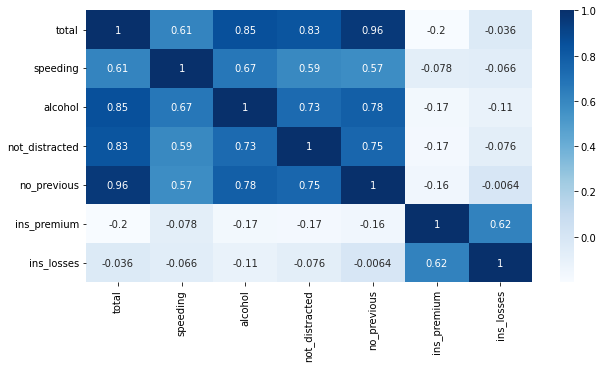

In [37]:
# Criando um heatmap com o DF 'crash_corr'.
plt.figure(figsize=(10,5))

# Esse tipo de gráfico pode ser bastante útil em projetos de ML sobre Regressão!
sns.heatmap(crash_corr, cmap='Blues', annot=True)

In [39]:
# Às vezes, é preciso ter criatividade para se criar heatmaps inteligentes, como no caso desse dataset sobre vôos.
flights = sns.load_dataset('flights')

# Em um primeiro instante, parece que não há nada de interessante que possa ser feito.
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [41]:
# Agora, vamos criar uma pivot-table com esses dados.
flight_pt = flights.pivot_table(index='year', columns='month', values='passengers')

# Veja, bastou ajustarmos as posições das coluas para termos um dataset próprio para um heatmap.
flight_pt

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<AxesSubplot:xlabel='month', ylabel='year'>

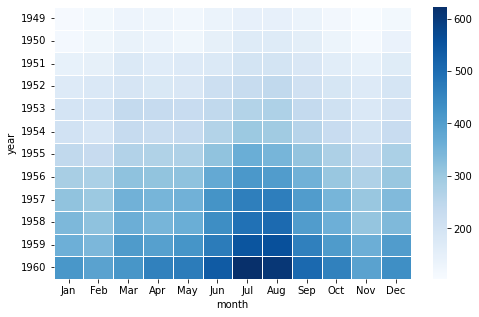

In [51]:
# Veja como como conseguimos criar um mapa de calor informativo com uma pivot-table.
# Se achar necessário, é possível inserir linhas que delimitam os retângulos, setando um valor para 'linewidth'.
plt.figure(figsize=(8,5))
sns.heatmap(flight_pt, cmap='Blues', linecolor='white', linewidth=1)

<h3 style='font-size:30px;font-style:italic'> Cluster Map</h3>

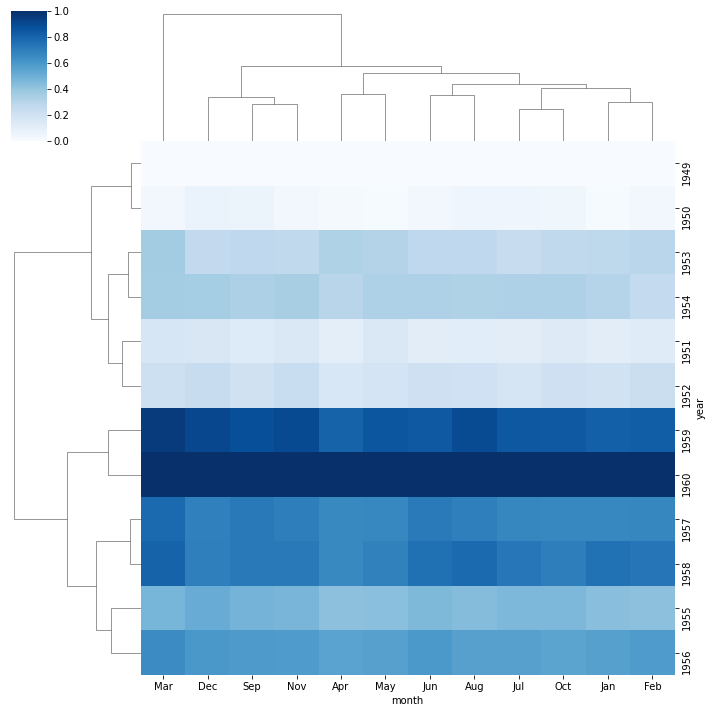

In [54]:
# Busca fazer agrupamentos com os dados oferecidos.

# Veja que os dados temporais não estão mais em ordem.
sns.clustermap(flight_pt, cmap='Blues', standard_scale=1)

### Pesquisar mais sobre esse tipo de gráfico. A explicação do Derek não foi muito boa. ###

<h3 style='font-size:30px;font-style:italic'> PairGrid</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Os PairGrid's são, de forma resumida, pairplots com um maior grau de customização.
        </li>
    </ul>
</div>

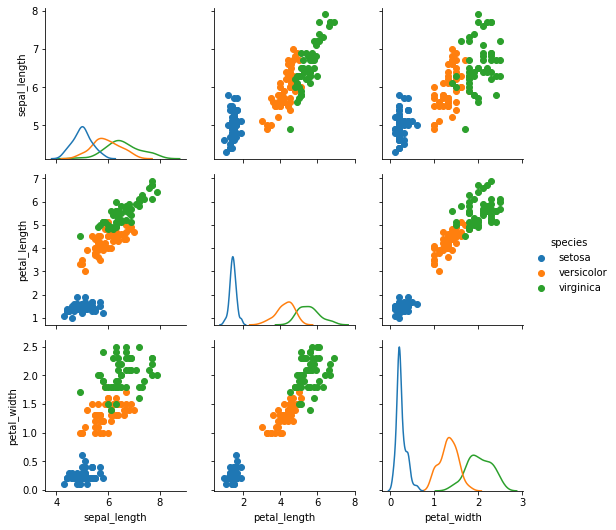

In [71]:
iris = sns.load_dataset('iris')

# Veja que, de imediato, podemos escolher quais colunas do DF serão utilizadas nos eixos com 'x_vars' e 'y_vars'.
iris_g = sns.PairGrid(iris, hue='species', x_vars=['sepal_length', 'petal_length', 'petal_width'],
                            y_vars=['sepal_length', 'petal_length', 'petal_width'])

# Use os métodos .map(..) para escolher que tipos de gráficos devem ser mostrados.

# Uma vez usado, o comando map pode ser desativado.
#iris_g.map(plt.scatter)
iris_g.map_diag(sns.kdeplot)

# Note que com o comando acima, vamos ter um histograma e scatter plots.
# Vamos desligar os scatter plots com o comando a seguir.
iris_g.map_offdiag(plt.scatter)

iris_g.add_legend()

<h3 style='font-size:30px;font-style:italic'> Facet Grid</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Facet Grids são grades de gráficos. Cada linha ou coluna se referencia às categorias disponíveis no DataFrame.
        </li>
    </ul>
</div>

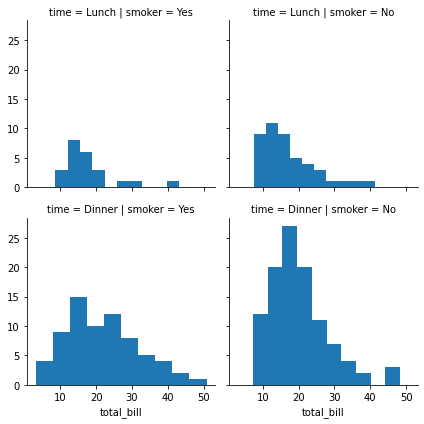

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
tips_df = sns.load_dataset('tips')

# As linhas da FacetGrid se referenciarão às categorias presentes na coluna 'time'; já as colunas, as da coluna 'smoker'
tips_fg = sns.FacetGrid(data=tips_df, row='time', col='smoker')

# Criando histogramas que mostram a frequência de valores de gorjeta por dia e características de consumidor.
tips_fg.map(plt.hist, 'total_bill', bins=10)

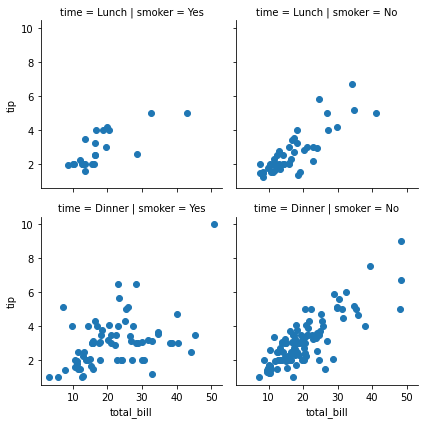

In [15]:
# Uma outra FacetGrid, agora com scatter plots.
tips_fg = sns.FacetGrid(data=tips_df, row='time', col='smoker')
tips_fg.map(plt.scatter, 'total_bill', 'tip')

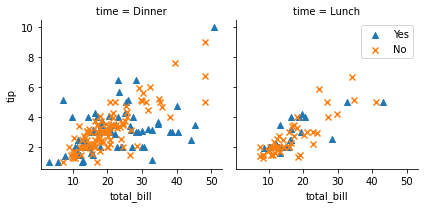

In [23]:
# Mais um, agora explorando o argumento 'hue'. Podemos ordenar a ordem das categorias a serem apresentadas 
# com 'col_order' e 'row_order'.
tips_fg = sns.FacetGrid(data=tips_df, col='time', hue='smoker', col_order=['Dinner', 'Lunch'],
                   hue_kws={'marker':['^', 'x']})
tips_fg.map(plt.scatter, 'total_bill', 'tip')
plt.legend()

<h2 style='font-size:30px'> Regression Plots</h2>

ValueError: markers must be a singeton or a list of markers for each level of the hue variable

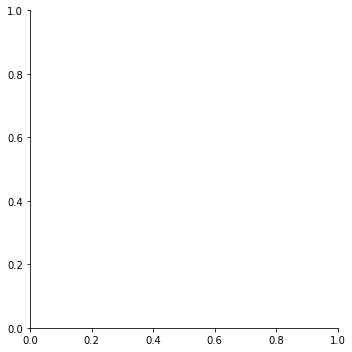

In [25]:
sns.lmplot(x='total_bill', y='tip', data=tips_df,hu ,markers=['o', '^'])

In [13]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<p style='color:red'> Começar pelos Facet Grids</p>